In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
# dataset is not included
file_name = "../data/dataset/drug_screen/merged.csv"

In [3]:
df = pd.read_csv(file_name)
df.rename(columns={'Unnamed: 0': "SMILES"}, inplace=True)
df = df.set_index("SMILES")
df = df.sort_index()
#show the columns 
df.columns
    

Index(['3CLPro_3', '3CLPro_2', '3CLPro_1', 'CoV_RDB_DA', 'CoV_RDB_AB',
       'CoV_RDB_CD', 'CoV_RDB_A_1', 'CoV_RDB_BC', 'PLPRO_2', 'plpro_1',
       'NSP15_3_6w01', 'NSP15_2_6w01', 'NSP15_1_6w01', 'DNMT3A_chainA',
       'NSUN2_model', 'Mpro-x0104', 'Mpro-x0161', 'Mpro-x0305', 'Mpro-x0107',
       'DNMT1_chainA', 'NSUN6', 'adrp_adpr_A', 'NSP15_2_6vww', 'NSP15_1_6vww'],
      dtype='object')

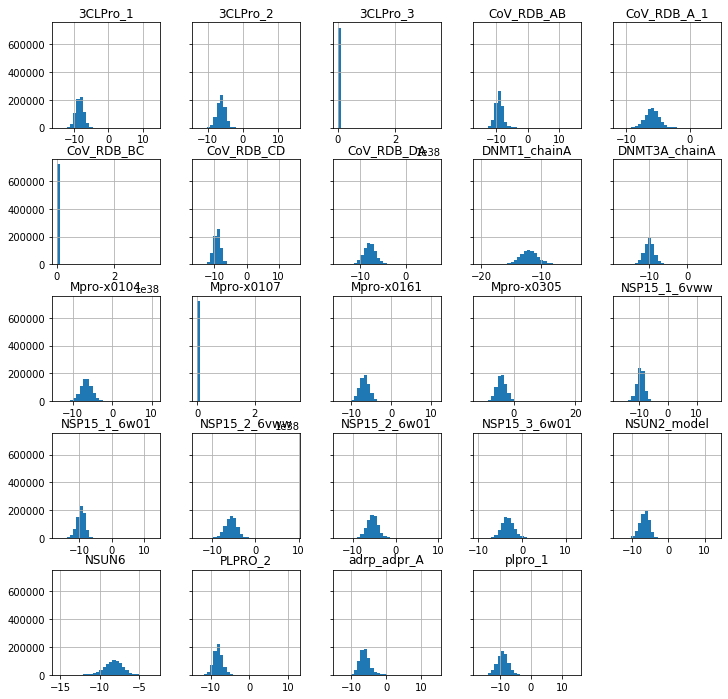

In [4]:
df.hist(figsize=(12,12), bins=30, sharex=False, sharey=True);

In [5]:
# count how many greater than 0
# only a small amount
tmp = (df>0).sum(axis=0)/(df.notnull().sum(axis=0))
print(tmp)
## note that, NSP15_3_6w01 has 2.14% are positive

3CLPro_3         0.001934
3CLPro_2         0.000216
3CLPro_1         0.000069
CoV_RDB_DA       0.000395
CoV_RDB_AB       0.000105
CoV_RDB_CD       0.000165
CoV_RDB_A_1      0.000183
CoV_RDB_BC       0.003500
PLPRO_2          0.000116
plpro_1          0.000132
NSP15_3_6w01     0.021413
NSP15_2_6w01     0.002363
NSP15_1_6w01     0.000086
DNMT3A_chainA    0.000008
NSUN2_model      0.000392
Mpro-x0104       0.000499
Mpro-x0161       0.001716
Mpro-x0305       0.009742
Mpro-x0107       0.002882
DNMT1_chainA     0.000000
NSUN6            0.000000
adrp_adpr_A      0.004003
NSP15_2_6vww     0.000945
NSP15_1_6vww     0.000150
dtype: float64


In [6]:
# count how many equal to 0
tmp = (df==0).sum(axis=0)
print(tmp)

3CLPro_3         0
3CLPro_2         0
3CLPro_1         0
CoV_RDB_DA       0
CoV_RDB_AB       0
CoV_RDB_CD       0
CoV_RDB_A_1      0
CoV_RDB_BC       0
PLPRO_2          0
plpro_1          0
NSP15_3_6w01     0
NSP15_2_6w01     0
NSP15_1_6w01     0
DNMT3A_chainA    0
NSUN2_model      0
Mpro-x0104       0
Mpro-x0161       0
Mpro-x0305       0
Mpro-x0107       0
DNMT1_chainA     0
NSUN6            0
adrp_adpr_A      0
NSP15_2_6vww     0
NSP15_1_6vww     0
dtype: int64


## clean up data

* remove NSP15_3_6w01 column due to 2% postive numbers
* remove rows contain null
* remove rows contain positive docking score 

In [7]:
df_clean = df.drop("NSP15_3_6w01", axis=1)
not_null_idx = ~(df_clean.isnull().any(axis=1))
not_pos_idx = ~((df_clean>0).any(axis=1))
df_clean = df_clean[not_null_idx&not_pos_idx]

In [8]:
df_clean.describe()

,3CLPro_3,3CLPro_2,3CLPro_1,CoV_RDB_DA,CoV_RDB_AB,CoV_RDB_CD,CoV_RDB_A_1,CoV_RDB_BC,PLPRO_2,plpro_1,...,NSUN2_model,Mpro-x0104,Mpro-x0161,Mpro-x0305,Mpro-x0107,DNMT1_chainA,NSUN6,adrp_adpr_A,NSP15_2_6vww,NSP15_1_6vww
count,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,...,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000,463147.000000
mean,-6.337926,-6.229977,-8.283597,-7.772082,-9.019062,-9.013853,-5.904697,-7.016432,-7.983082,-9.085254,...,-6.537826,-6.492365,-6.608471,-3.845938,-5.625216,-11.856106,-8.220954,-6.110112,-5.578299,-9.549305
std,1.193936,1.142422,1.147303,1.341930,1.120126,1.116530,1.041730,1.637843,1.113599,1.696519,...,1.266036,1.484910,1.274947,1.488136,1.611609,1.590348,1.184977,1.491467,1.338805,1.278423
min,-11.840996,-13.037089,-15.065863,-14.913067,-15.744535,-15.411388,-10.952646,-14.525280,-13.482728,-17.105148,...,-13.319108,-14.081905,-13.104127,-11.611899,-14.251863,-20.591736,-15.473802,-13.409749,-13.480436,-17.319027
25%,-7.120437,-6.956430,-9.016520,-8.654412,-9.726702,-9.710711,-6.578597,-8.124911,-8.709274,-10.207579,...,-7.340445,-7.460514,-7.419939,-4.872345,-6.659436,-12.894045,-8.950531,-7.084898,-6.456106,-10.335510
50%,-6.377078,-6.184333,-8.258713,-7.792422,-9.004101,-8.975080,-5.897075,-7.169652,-8.013744,-9.021996,...,-6.441447,-6.530542,-6.608246,-3.873041,-5.570959,-11.904014,-8.140487,-6.188046,-5.538404,-9.465992
75%,-5.617136,-5.458814,-7.525505,-6.937639,-8.310539,-8.291018,-5.226772,-6.070341,-7.291637,-7.920493,...,-5.662637,-5.558816,-5.798955,-2.826909,-4.547066,-10.889037,-7.412440,-5.235299,-4.665719,-8.682969
max,-0.027654,-0.618726,-3.120614,-0.491150,-1.732656,-2.387242,-0.099889,-0.007108,-1.313921,-0.789464,...,-0.990292,-0.010711,-0.010604,-0.000004,-0.000593,-4.161478,-3.321147,-0.000157,-0.072345,-4.383656


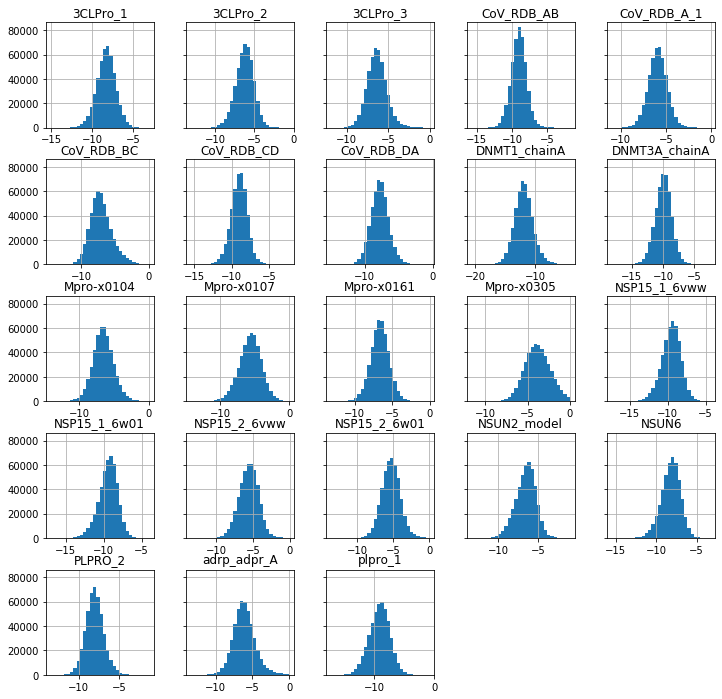

In [9]:
# plot the df_clean()
df_clean.hist(figsize=(12,12), bins=30, sharex=False, sharey=True);

In [10]:
## NOTE, the avg of the docking scores are different.
df_clean.mean(axis=0)

3CLPro_3         -6.337926
3CLPro_2         -6.229977
3CLPro_1         -8.283597
CoV_RDB_DA       -7.772082
CoV_RDB_AB       -9.019062
CoV_RDB_CD       -9.013853
CoV_RDB_A_1      -5.904697
CoV_RDB_BC       -7.016432
PLPRO_2          -7.983082
plpro_1          -9.085254
NSP15_2_6w01     -5.341279
NSP15_1_6w01     -9.392150
DNMT3A_chainA    -9.969536
NSUN2_model      -6.537826
Mpro-x0104       -6.492365
Mpro-x0161       -6.608471
Mpro-x0305       -3.845938
Mpro-x0107       -5.625216
DNMT1_chainA    -11.856106
NSUN6            -8.220954
adrp_adpr_A      -6.110112
NSP15_2_6vww     -5.578299
NSP15_1_6vww     -9.549305
dtype: float64

# Split and Save DATA

In [11]:
np.random.seed(7)
rnd_state = np.random.get_state()
idx = np.arange(len(df_clean))
np.random.shuffle(idx)

In [12]:
train_sz, val_sz = 300000, 80000
train_idx, val_idx, test_idx = idx[:train_sz], idx[train_sz:(train_sz+val_sz)], idx[(train_sz+val_sz):]
print(list(map(len, [train_idx, val_idx, test_idx])))

[300000, 80000, 83147]


In [13]:
df_clean.iloc[train_idx].to_csv('./docking_train.csv')
df_clean.iloc[val_idx].to_csv('./docking_val.csv')
df_clean.iloc[test_idx].to_csv('./docking_test.csv')

In [14]:
## Test load
df_train = pd.read_csv('./docking_train.csv', index_col='SMILES')
df_val = pd.read_csv('./docking_val.csv', index_col='SMILES')
df_test = pd.read_csv('./docking_test.csv', index_col='SMILES')

In [15]:
df_train.columns, df_train.index.name

(Index(['3CLPro_3', '3CLPro_2', '3CLPro_1', 'CoV_RDB_DA', 'CoV_RDB_AB',
        'CoV_RDB_CD', 'CoV_RDB_A_1', 'CoV_RDB_BC', 'PLPRO_2', 'plpro_1',
        'NSP15_2_6w01', 'NSP15_1_6w01', 'DNMT3A_chainA', 'NSUN2_model',
        'Mpro-x0104', 'Mpro-x0161', 'Mpro-x0305', 'Mpro-x0107', 'DNMT1_chainA',
        'NSUN6', 'adrp_adpr_A', 'NSP15_2_6vww', 'NSP15_1_6vww'],
       dtype='object'), 'SMILES')

In [16]:
df_train == df_clean.iloc[train_idx]

,3CLPro_3,3CLPro_2,3CLPro_1,CoV_RDB_DA,CoV_RDB_AB,CoV_RDB_CD,CoV_RDB_A_1,CoV_RDB_BC,PLPRO_2,plpro_1,...,NSUN2_model,Mpro-x0104,Mpro-x0161,Mpro-x0305,Mpro-x0107,DNMT1_chainA,NSUN6,adrp_adpr_A,NSP15_2_6vww,NSP15_1_6vww
SMILES,,,,,,,,,,,,,,,,,,,,,
C1C[NH+](CCC1CO)CC(=O)NCC(F)(F)F,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
c1cc2c(nc1)N(c3c(c(ccn3)C[NH+]4CCCC4)NC2=O)C5CC5,False,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
CCn1c2ccccc2nc1NC(=O)CCc3nc(no3)c4ccccc4,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,False,True
Cc1c(c(n(n1)Cc2ccccc2)C)CNC(=O)c3ccc(cc3)OCC(=O)N,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
CC(C)C(=O)Nc1cccc(c1)NC(=O)c2ccc(nn2)O,True,True,True,True,False,True,True,True,False,True,...,True,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC(C)CN1C(=O)C(=O)N(C1=O)CC(F)F,True,True,True,False,True,True,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
Cc1cc(c(n1c2[nH]ncn2)C)c3c(c(c4ccccc4n3)C)Cl,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,False,True,True
Cc1ccc2cc([nH]c2c1)C(=O)NC[C@@H](C)c3nc(cs3)C,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True


In [17]:
## takes some time
pd.testing.assert_frame_equal(df_train, df_clean.iloc[train_idx])